# Importing libraries and loading the data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [ ]:
!pip install plotly==4.8
import plotly.express as px
import plotly
plotly.__version__

'4.8.0'

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

data = pd.read_excel('./drive/MyDrive/USA-Emissions.xlsx', index_col='year')
data.head()

data = data[data.index >= 1800]
data

Mounted at /content/drive


,co2,co2_growth_prct,co2_growth_abs,consumption_co2,trade_co2,trade_co2_share,co2_per_capita,consumption_co2_per_capita,share_global_co2,cumulative_co2,share_global_cumulative_co2,co2_per_gdp,consumption_co2_per_gdp,co2_per_unit_energy,cement_co2,coal_co2,flaring_co2,gas_co2,oil_co2,cement_co2_per_capita,coal_co2_per_capita,flaring_co2_per_capita,gas_co2_per_capita,oil_co2_per_capita,total_ghg,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,primary_energy_consumption,energy_per_capita,energy_per_gdp,population,gdp
year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1800,0.253,NaN,0.253,NaN,NaN,NaN,0.037,NaN,0.900,0.253,0.033,NaN,NaN,NaN,0.000,0.253,0.00,0.000,0.00,0.00,0.037,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6801854.0,NaN
1801,0.267,5.797,0.015,NaN,NaN,NaN,0.039,NaN,0.957,0.520,0.065,NaN,NaN,NaN,0.000,0.267,0.00,0.000,0.00,0.00,0.039,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6933517.0,NaN
1802,0.289,8.219,0.022,NaN,NaN,NaN,0.041,NaN,0.787,0.810,0.097,NaN,NaN,NaN,0.000,0.289,0.00,0.000,0.00,0.00,0.041,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7067728.0,NaN
1803,0.297,2.532,0.007,NaN,NaN,NaN,0.041,NaN,0.943,1.107,0.127,NaN,NaN,NaN,0.000,0.297,0.00,0.000,0.00,0.00,0.041,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7204538.0,NaN
1804,0.333,12.346,0.037,NaN,NaN,NaN,0.045,NaN,0.972,1.440,0.160,NaN,NaN,NaN,0.000,0.333,0.00,0.000,0.00,0.00,0.045,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7343995.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014,5572.106,0.891,49.198,5939.828,367.721,6.599,17.485,18.639,15.693,383352.700,26.115,0.338,0.360,0.215,41.454,1648.972,15.55,1431.594,2112.41,0.13,5.174,0.049,4.492,6.629,6097.75,19.135,650.62,2.042,251.37,0.789,25968.99,81491.04,1.574,319000000.0,1.650000e+13
2015,5422.966,-2.677,-149.141,5804.531,381.565,7.036,16.900,18.090,15.292,388775.700,25.859,0.321,0.343,0.211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5966.46,18.594,648.55,2.021,249.24,0.777,25739.63,80216.25,1.523,321000000.0,1.690000e+13
2016,5306.662,-2.145,-116.303,5694.022,387.360,7.300,16.428,17.628,14.875,394082.400,25.605,0.309,0.331,0.206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5833.49,18.059,629.38,1.948,251.70,0.779,25733.26,79665.59,1.496,323000000.0,1.720000e+13


In [ ]:
data.columns

Index(['co2', 'co2_growth_prct', 'co2_growth_abs', 'consumption_co2',
       'trade_co2', 'trade_co2_share', 'co2_per_capita',
       'consumption_co2_per_capita', 'share_global_co2', 'cumulative_co2',
       'share_global_cumulative_co2', 'co2_per_gdp', 'consumption_co2_per_gdp',
       'co2_per_unit_energy', 'cement_co2', 'coal_co2', 'flaring_co2',
       'gas_co2', 'oil_co2', 'cement_co2_per_capita', 'coal_co2_per_capita',
       'flaring_co2_per_capita', 'gas_co2_per_capita', 'oil_co2_per_capita',
       'total_ghg', 'ghg_per_capita', 'methane', 'methane_per_capita',
       'nitrous_oxide', 'nitrous_oxide_per_capita',
       'primary_energy_consumption', 'energy_per_capita', 'energy_per_gdp',
       'population', 'gdp'],
      dtype='object')

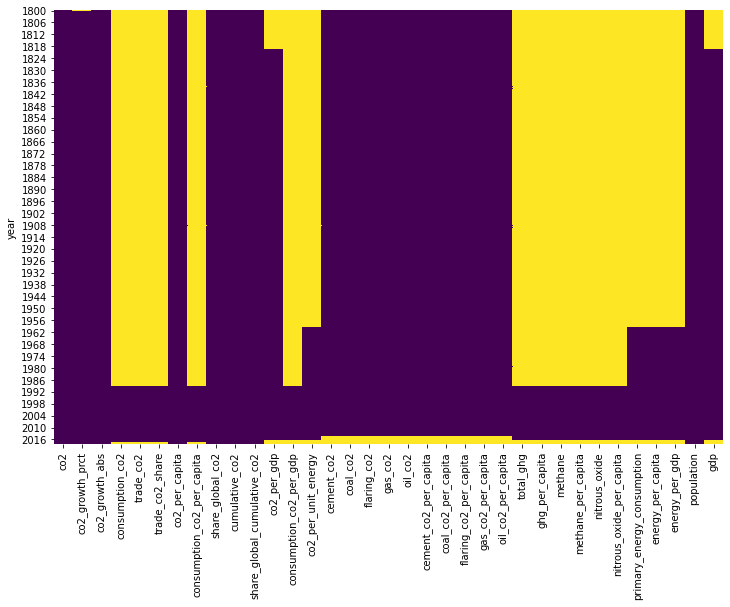

In [ ]:
fig = plt.subplots(figsize=(12,8))
sns.heatmap(data.isnull(),cbar=False,cmap = 'viridis');

# co2, prct, abs, percapita, population
# shareglobal, cumulative, sharegloablCumulative?


# cement, coal,flaring, gas, oil,
# gdp?

## Making a subset based on the columns with values across all the years

In [ ]:
testdata = data[['co2','co2_growth_prct','co2_growth_abs','co2_per_capita','population','share_global_co2', 'cumulative_co2']]
testdata_reset = testdata.reset_index()


# Descriptive Analysis on the subset of data

In [ ]:
testdata.shape

(219, 7)

In [ ]:
testdata.columns

Index(['co2', 'co2_growth_prct', 'co2_growth_abs', 'co2_per_capita',
       'population', 'share_global_co2', 'cumulative_co2'],
      dtype='object')

Plotting for any missing values.

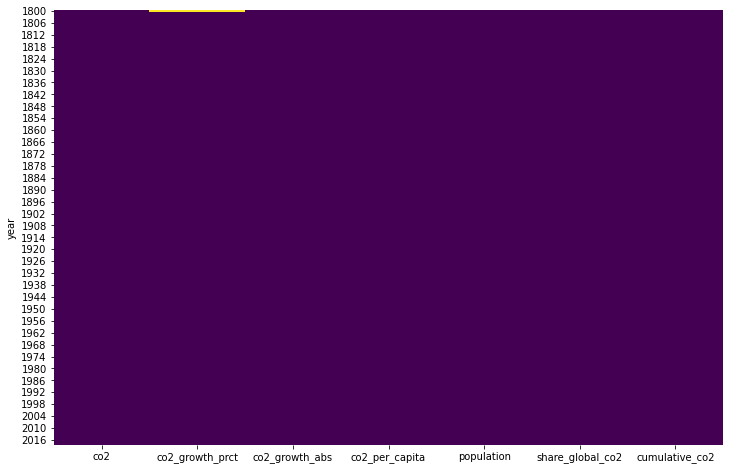

In [ ]:
fig = plt.subplots(figsize=(12,8))
sns.heatmap(testdata.isnull(),cbar=False,cmap = 'viridis');

# cement, coal,flaring, gas, oil,
# gdp?


We're having one missing value at the start of co2_growth_prct

As this variable equals to percentage change in co2 emissions relative to the previous year, the very first value is Null.

In [ ]:
testdata.describe()

,co2,co2_growth_prct,co2_growth_abs,co2_per_capita,population,share_global_co2,cumulative_co2
count,219.000000,218.000000,219.000000,219.000000,2.190000e+02,219.000000,219.000000
mean,1848.262087,4.991683,24.731868,9.831027,1.163631e+08,23.477571,82841.058114
std,2057.318219,8.100521,115.788977,7.890503,9.738632e+07,14.739771,114331.868173
min,0.253000,-18.084000,-434.708000,0.037000,6.801854e+06,0.787000,0.253000
25%,35.660000,0.738000,0.033000,1.294500,2.752198e+07,13.207000,323.800500
50%,1201.803000,4.424500,4.400000,11.442000,9.236198e+07,23.470000,19359.050000
75%,3184.388500,9.470000,79.919500,16.543500,1.960000e+08,35.634500,129511.750000
max,6130.552000,33.495000,460.682000,22.133000,3.270000e+08,54.353000,404769.400000


* By comparing the mean and median values of each column, we can get a rough estimate of the distributions of values in each column.
* The columnns co2, population show that the mean values are much larger than the median values.

# Exploratory Data Analysis

## CO2

In [ ]:
fig = px.box(testdata,y='co2',points='all',)
# fig = px.box(testdata,y='population',points='outliers')
# fig = px.box(testdata,y='co2')
fig.update_layout(width=800)
fig.show()

With the box plot above, we can check how the values are spread.

Hovering over the boxes, you can see the values from min to median to max.

Also values of all the points are shown to the left. As the max value does not go beyond the whisker line, we should estimate there are no outliers. We can also confirm it by changing the _points_ parameter to 'outliers'. It will not show any points.

The absence of outliers indicates that all the sudden drops or steep growth in the emissions were reasonable. There were no events that lead to unreasonable changes in emissions that might have produced outliers.

In [ ]:
fig = px.histogram(testdata['co2'],)
fig.update_layout(width=800)
fig.show()

In [ ]:
fig = px.line(testdata_reset,x='year',y='co2')
fig.update_layout(width=800)
fig.show()


The sudden declines such as (1929-1933, 1978-1982) might be due to the great depression era, the inflations in late 70s, respectively.

The decades 1960s and 1980s show steep rise. The economy was also on rise that time.

After the peak of 6130.55 in 2005, the values seem to be decreasing after 2007. Maybe due to Obama gov policies.


## Absolute and percentage growth

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=3, cols=1)

fig.append_trace(go.Scatter(
    x=testdata.index,
    y=testdata['co2'],
    name='co2'
), row=1, col=1)

fig.append_trace(go.Scatter(
    x=testdata.index,
    y=testdata['co2_growth_prct'],
    name = "co2_growth_prct"
), row=2, col=1)

fig.append_trace(go.Scatter(
    x=testdata.index,
    y=testdata['co2_growth_abs'],
    name='co2_growth_abs'
), row=3, col=1)


fig.update_layout(height=600, width=800, title_text="Stacked!")
fig.show()

In [ ]:
testdata.loc[1980:2000]

,co2,co2_growth_prct,co2_growth_abs,co2_per_capita,population,share_global_co2,cumulative_co2
year,,,,,,,
1980,4716.716,-3.623,-177.327,20.554,229000000.0,24.328,200456.4
1981,4530.370,-3.951,-186.347,19.558,232000000.0,24.114,204986.7
1982,4301.971,-5.042,-228.399,18.398,234000000.0,23.099,209288.7
1983,4335.917,0.789,33.946,18.370,236000000.0,23.375,213624.6
1984,4468.262,3.052,132.345,18.754,238000000.0,23.252,218092.9
1985,4484.338,0.360,16.076,18.646,241000000.0,22.657,222577.2
1986,4487.856,0.078,3.518,18.487,243000000.0,22.004,227065.1
1987,4680.834,4.300,192.978,19.101,245000000.0,22.383,231745.9
1988,4885.591,4.374,204.756,19.750,247000000.0,22.534,236631.5


The second and third graphs show percent and absolute changes in the values, relative to the previous year, respectively.

## Per capita values

In [ ]:
fig = make_subplots(rows=3, cols=1)

fig.append_trace(go.Scatter(
    x=testdata.index,
    y=testdata['co2'],
    name='co2'
), row=1, col=1)

fig.append_trace(go.Scatter(
    x=testdata.index,
    y=testdata['population'],
    name = "population"
), row=2, col=1)

fig.append_trace(go.Scatter(
    x=testdata.index,
    y=testdata['co2_per_capita'],
    name='co2_per_capita'
), row=3, col=1)


fig.update_layout(height=600, width=800, title_text="Stacked!")
fig.show()

As expcted, we see can see that both the co2 and co2_per_capita variables show mostly similar trends. 

But the co2_per_capita variable peaks at 22.133 in 1973.

After 2007, it keeps on decreasing.

## Global share 

In [ ]:
fig = px.line(testdata_reset,x='year',y='share_global_co2')
fig.update_layout(width=800)
fig.show()

Years 1926 to 1938 show steady decline in the global share of co2 emissions for USA.

After which it starts to increase rapidly and peaks at 54.35 in the year 1945.

It may mean that many other countries started emitting co2 more rapidly than before.

Four slopes for the four phases

In [ ]:
fig = px.box(testdata_reset,y='share_global_co2',points='all')
fig.update_layout(width=800)
fig.show()


No outliers present here too.

# Looking for relationships

## Correlations

In [ ]:
testdata.corr()

,co2,co2_growth_prct,co2_growth_abs,co2_per_capita,population,share_global_co2,cumulative_co2
co2,1.000000,-0.370633,0.119114,0.908214,0.983606,0.282274,0.959937
co2_growth_prct,-0.370633,1.000000,0.543807,-0.379988,-0.401674,-0.233236,-0.352988
co2_growth_abs,0.119114,0.543807,1.000000,0.197126,0.091382,0.171164,0.030850
co2_per_capita,0.908214,-0.379988,0.197126,1.000000,0.921184,0.638238,0.780450
population,0.983606,-0.401674,0.091382,0.921184,1.000000,0.371469,0.954440
share_global_co2,0.282274,-0.233236,0.171164,0.638238,0.371469,1.000000,0.104966
cumulative_co2,0.959937,-0.352988,0.030850,0.780450,0.954440,0.104966,1.000000


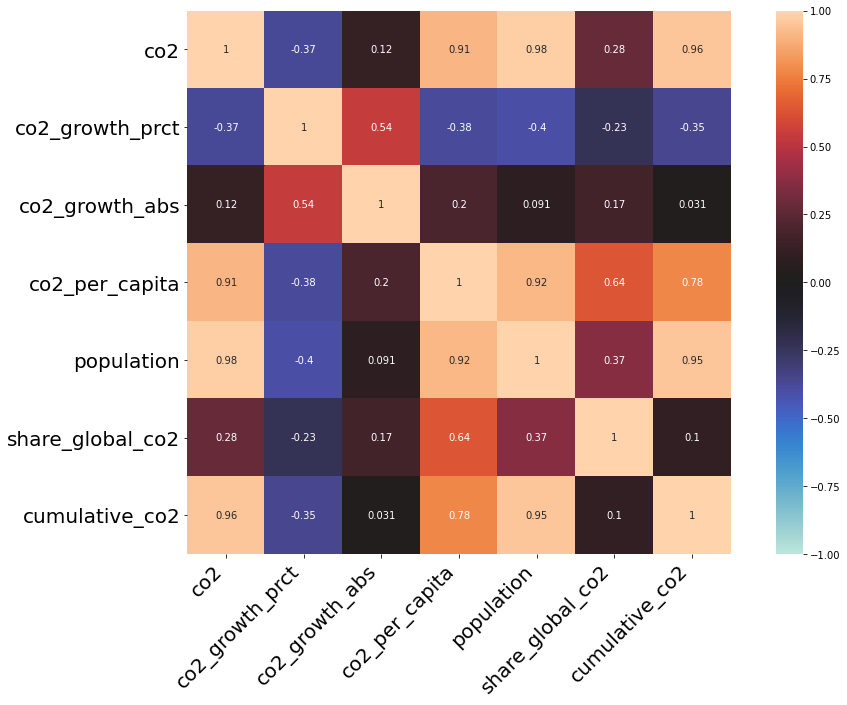

In [ ]:
fig, ax = plt.subplots(figsize=(16,10))
corr = testdata.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    square=True,
    annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right',
    fontsize=20
);
ax.set_yticklabels(
    ax.get_yticklabels(),
    fontsize=20
);

*co2*, cumulative_co2, population, co2_per_capita, share_global_co2

## Seasonal decompose

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



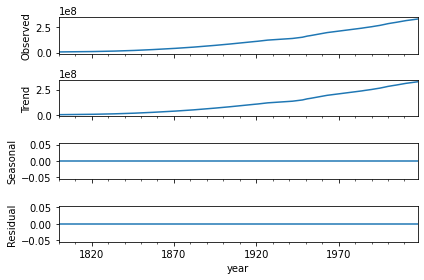

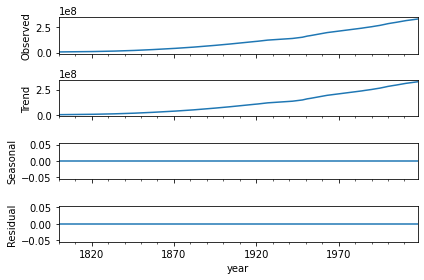

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
pop = testdata.population
# print(pop.index)

pop.index = pd.to_datetime(pop.index,format='%Y')
result = seasonal_decompose(pop)
result.plot()


## AutoRegression

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.



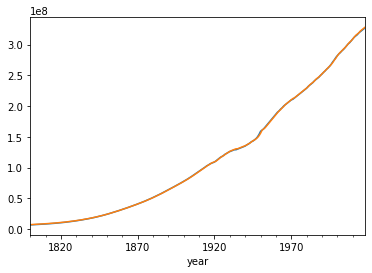

In [ ]:
from statsmodels.tsa.ar_model import AR

pop = testdata.population
AR = AR(pop)
res = AR.fit(maxlag=1)
pred = res.predict()

pop.plot(label="true")
pred.plot(label="pred")

## Linear Regression

In [ ]:
X = testdata_reset[['year','population']]
y = testdata_reset['co2']

X = X.to_numpy()
m = X.shape[0]
y = y.to_numpy().reshape((m,1))
# print(X.shape)
# print(y.shape)

theta = np.array([[0],[0]])

In [ ]:
X.dot(theta)[:5]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [ ]:
def computeCost(yhat,y,m):
    J = (1/(2*m)) * np.sum(np.square(y - yhat))
    return J

def computeGradientDescent(X,y,theta,alpha,num_iters,m):
    thetaCopy = theta.copy()
    J_history = []
    for i in range(num_iters):
        yhat = X.dot(thetaCopy)
        thetaCopy = thetaCopy - (alpha/m)*np.sum((y-yhat)*X)
        J_history.append(computeCost(yhat,y,m))
    return thetaCopy, J_history

In [ ]:
theta, J_histoy = computeGradientDescent(X,y,theta,alpha=0.01,num_iters=1500,m=m)
print("theta values = {},{}".format(*theta))

theta values = [-inf],[-inf]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning:

overflow encountered in multiply

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: RuntimeWarning:

overflow encountered in reduce



In [ ]:
J_histoy

[3814652.121907496,
 1.943336936103819e+35,
 1.0263815703993584e+64,
 5.420877401566425e+92,
 2.863059182890402e+121,
 1.5121367405144434e+150,
 7.98641374819661e+178,
 4.218057986983654e+207,
 2.2277850537826403e+236,
 1.176614039250417e+265,
 6.2143364998814504e+293,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf

In [ ]:
# from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error, r2_score

# LR = LinearRegression()

# X_train, X_test, y_train, y_test = train_test_split(X, y)

# LR.fit(X = X_train, y = y_train)


In [ ]:
# LR.coef_

In [ ]:
# y_pred = LR.predict(X_test)
# print(mean_squared_error(y_true=y_test, y_pred=y_pred))
# print(r2_score(y_test,y_pred))

In [ ]:
# fig = px.scatter(x=X_test, y=y_test, color='year')
# fig = px.scatter(x=X_test, y=y_pred, color='year')
# fig.show()

## Exponential Smoothing

In [ ]:
testdata.shape

(219, 7)

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing as SES
model = SES(testdata_reset['population'])
model_fit = model.fit(smoothing_level=0.9,)
yhat = model_fit.predict(start=220,end=230)
yhat

220    3.267778e+08
221    3.267778e+08
222    3.267778e+08
223    3.267778e+08
224    3.267778e+08
225    3.267778e+08
226    3.267778e+08
227    3.267778e+08
228    3.267778e+08
229    3.267778e+08
230    3.267778e+08
dtype: float64

## OLS

In [ ]:
fig = px.scatter(data_frame=testdata_reset,x=testdata_reset['year'],y=testdata_reset['co2'],color='year',
                 color_continuous_scale="amp",trendline="ols")
fig.update_layout(width=800)
fig.show()

# print(px.get_trendline_results(fig))

In [ ]:
fig = px.scatter(data_frame=testdata_reset,x=testdata_reset['year'],y=testdata_reset['population'],color='year',
                 color_continuous_scale="amp",trendline="lowess",)
fig.update_layout(width=800)
fig.show()

In [ ]:
predictionYears = pd.Series(data=range(2019,2030))
predictionYears

0     2019
1     2020
2     2021
3     2022
4     2023
5     2024
6     2025
7     2026
8     2027
9     2028
10    2029
dtype: int64

In [ ]:
predPop = 1489500*predictionYears - 2.7272*(10**9)
predPop

0     280100500.0
1     281590000.0
2     283079500.0
3     284569000.0
4     286058500.0
5     287548000.0
6     289037500.0
7     290527000.0
8     292016500.0
9     293506000.0
10    294995500.0
dtype: float64

In [ ]:
fig = px.scatter(data_frame=testdata_reset,x=testdata_reset['population'],y=testdata_reset['co2'],color='year',
                 color_continuous_scale="amp",trendline="ols")
fig.update_layout(width=800)
fig.show()

In [ ]:
predCO2 = 2.0779*(10**-5)*predPop - 569.647
predCO2

0     5250.561290
1     5281.511610
2     5312.461931
3     5343.412251
4     5374.362572
5     5405.312892
6     5436.263213
7     5467.213533
8     5498.163854
9     5529.114174
10    5560.064495
dtype: float64

In [ ]:
predCO2perCapita = predCO2/predPop

**2nd degree polynomial equation from excel**

In [ ]:
predictedPopulation = 6655.0115 * predictionYears **2 - 23919258.25015 * predictionYears + 21498897117.8807
predictedPopulation

0     3.341440e+08
1     3.371044e+08
2     3.400780e+08
3     3.430650e+08
4     3.460652e+08
5     3.490788e+08
6     3.521057e+08
7     3.551459e+08
8     3.581994e+08
9     3.612662e+08
10    3.643463e+08
dtype: float64

In [ ]:
predictedPopulation.values

array([3.34144044e+08, 3.37104377e+08, 3.40078020e+08, 3.43064974e+08,
       3.46065237e+08, 3.49078810e+08, 3.52105694e+08, 3.55145887e+08,
       3.58199390e+08, 3.61266204e+08, 3.64346327e+08])

In [ ]:
# predictedCO2 = 2.0779*(10**-5)*predictedPopulation - 569.647
# predictedCO2 = -40587 + 3.19E-04x + -5.48E-13x^2
predictedCo2 = (-40587) + (3.19*(10**(-4))*predictedPopulation)+ (-5.48*(10**(-13))*(predictedPopulation**2))
predictedCO2

0     6373.532090
1     6435.044853
2     6496.834186
3     6558.900087
4     6621.242558
5     6683.861597
6     6746.757206
7     6809.929383
8     6873.378129
9     6937.103444
10    7001.105329
dtype: float64

In [ ]:
predictions = pd.DataFrame(data={'population':predictedPopulation.values,'co2':predictedCO2.values},
                           index=predictionYears.values)
predictions

,population,co2
2019,3.341440e+08,6373.532090
2020,3.371044e+08,6435.044853
2021,3.400780e+08,6496.834186
2022,3.430650e+08,6558.900087
2023,3.460652e+08,6621.242558
2024,3.490788e+08,6683.861597
2025,3.521057e+08,6746.757206
2026,3.551459e+08,6809.929383
2027,3.581994e+08,6873.378129
2028,3.612662e+08,6937.103444


In [ ]:
testdataWithPredictions = pd.concat([testdata[['population','co2']],predictions],axis=0)
testdataWithPredictions.tail(15)

,population,co2
2015,3.210000e+08,5422.966000
2016,3.230000e+08,5306.662000
2017,3.250000e+08,5270.749000
2018,3.270000e+08,5416.278000
2019,3.341440e+08,6373.532090
2020,3.371044e+08,6435.044853
2021,3.400780e+08,6496.834186
2022,3.430650e+08,6558.900087
2023,3.460652e+08,6621.242558
2024,3.490788e+08,6683.861597


In [ ]:
fig = px.scatter(data_frame=testdataWithPredictions,x=testdataWithPredictions['population'],y=testdataWithPredictions['co2'],
                 color=testdataWithPredictions.index,
                 color_continuous_scale="amp")
fig.update_layout(width=800)
fig.show()

In [ ]:
fig = px.scatter(x = predictedPopulation, y = predictedCO2)
fig.update_layout(width=800)
fig.show()

## Other variables' correlation

In [ ]:
fig = px.scatter(data_frame=testdata_reset,x=testdata_reset['co2'],y=testdata_reset['cumulative_co2'],color='year',
                 color_continuous_scale='Viridis_r',trendline="ols")
fig.update_layout(width=800)
fig.show()

In [ ]:
fig = px.scatter(data_frame=testdata_reset,x=testdata_reset['co2'],y=testdata_reset['co2_per_capita'],color='year',
                 color_continuous_scale='Viridis_r',trendline="lowess")
fig.update_layout(width=800)
fig.show()

In [ ]:
fig = px.scatter(data_frame=testdata_reset,x=testdata_reset['population'],y=testdata_reset['co2_per_capita'],color='year',
                 color_continuous_scale='Viridis_r',trendline="lowess",)
fig.update_layout(width=800)
fig.show()

In [ ]:
fig = px.scatter(data_frame=testdata_reset,x=testdata_reset['population'],y=testdata_reset['cumulative_co2'],
                 color='year',color_continuous_scale='Viridis_r',trendline="lowess")
fig.update_layout(width=800)
fig.show()